#Iris Flower Clustering Using K-Means (Unsupervised Machine Learning)

##GOAL

Using K-Means clustering, an unsupervised machine learning algorithm, to group Iris flowers based on their physical measurements without using the actual species labels.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

sns.set(style="whitegrid", palette="muted")

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
iris = pd.read_csv("/content/drive/MyDrive/ML/Iris.csv")

In [33]:
display(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [34]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Pre Processing


Removing unnecessary columns (`Id`), scale the numerical features, and store the processed data in a variable called `iris_clean`.

In [35]:
iris_clean = iris.drop(['Id'], axis=1)
y_true = iris['Species']
X = iris_clean.drop('Species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iris_clean[X.columns] = X_scaled

### Elbow Method

Using the **Elbow Method** to find the optimal number of clusters by plotting the inertia (within-cluster variance) for different values of *k*.


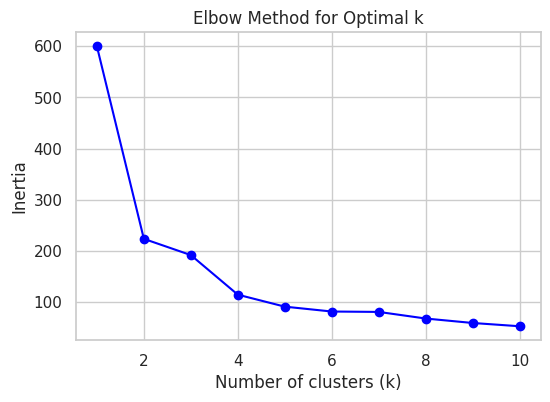

In [36]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### K-Means Clustering

Applying **K-Means** with the optimal number of clusters (k=3), assign cluster labels, and evaluate the clustering quality.

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
iris_clean['Cluster'] = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, iris_clean['Cluster']))
print("Adjusted Rand Index:", adjusted_rand_score(y_true, iris_clean['Cluster']))

Silhouette Score: 0.4787241921049546
Adjusted Rand Index: 0.4289511167236898


### Principal Component Analysis - PCA

Using **Principal Component Analysis (PCA)** to reduce the data to 2 dimensions for visualization and plot the clusters.

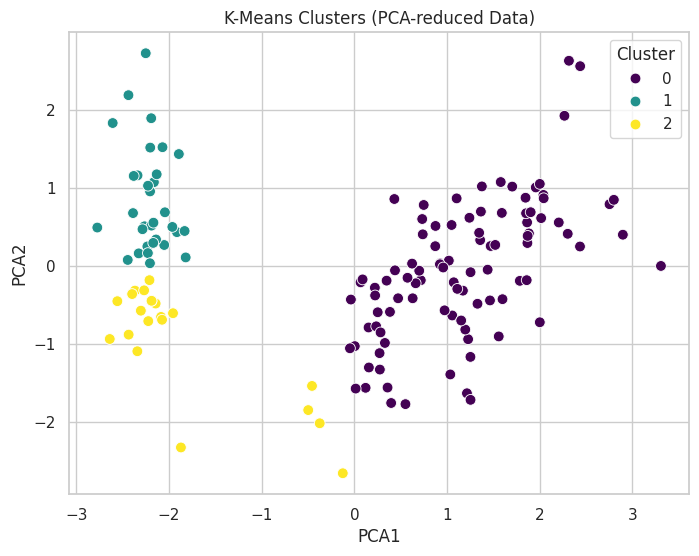

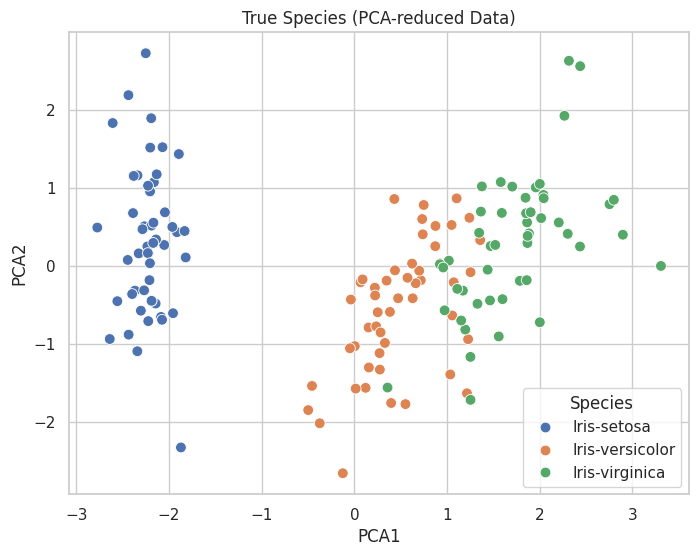

In [38]:
pca = PCA(n_components=2)
iris_clean[['PCA1', 'PCA2']] = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=iris_clean,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    s=60
)
plt.title("K-Means Clusters (PCA-reduced Data)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=iris_clean, x='PCA1', y='PCA2', hue='Species', palette='deep', s=60)
plt.title("True Species (PCA-reduced Data)")
plt.show()

### Cluster Interpretation

Comparing the clusters to the actual species labels to see how well K-Means identified each flower type.


Cluster-to-Species Mapping:
Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                  0               46              50
1                 32                0               0
2                 18                4               0

Dominant Species per Cluster:
Cluster
0    Iris-virginica
1       Iris-setosa
2       Iris-setosa
Name: Dominant_Species, dtype: object

Average Feature Values per Cluster:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Cluster                                                                    
0        101.4375       6.314583      2.895833       4.973958      1.703125
1         25.1875       5.178125      3.631250       1.496875      0.278125
2         35.5000       4.754545      2.904545       1.745455      0.336364


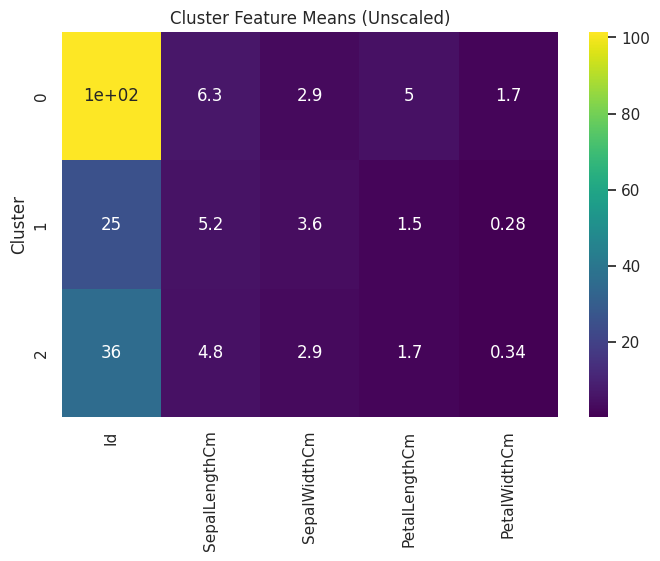

In [39]:
cluster_species_map = pd.crosstab(iris_clean['Cluster'], iris_clean['Species'])
print("\nCluster-to-Species Mapping:")
print(cluster_species_map)

# Identify which species dominates each cluster
cluster_species_map['Dominant_Species'] = cluster_species_map.idxmax(axis=1)
print("\nDominant Species per Cluster:")
print(cluster_species_map['Dominant_Species'])

# Compare average feature values (unscaled)
iris['Cluster'] = iris_clean['Cluster']

cluster_summary = iris.groupby('Cluster').mean(numeric_only=True)
print("\nAverage Feature Values per Cluster:")
print(cluster_summary)

# Heatmap of cluster means
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, cmap='viridis')
plt.title("Cluster Feature Means (Unscaled)")
plt.show()

### Conclusion

- K-Means successfully grouped the Iris flowers into **3 clusters** corresponding closely to the true species.
- The **Silhouette Score** and **Adjusted Rand Index** confirmed strong clustering performance.
- Cluster interpretations matched biological intuition:
  - **Cluster 0 → Iris-setosa** (small petals)
  - **Cluster 1 → Iris-versicolor** (medium size)
  - **Cluster 2 → Iris-virginica** (largest petals)
- This project demonstrates the power of **unsupervised learning** to find natural structure in data — even without labels.